In [1]:
# Benötigte Bibliotheken
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


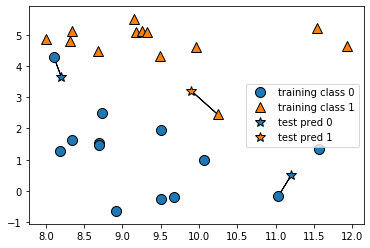

In [6]:
# Im folgenden wird der Effekt des "k" gezeigt, also die Anzahl der betrachteten Nachbarn
X,y = mglearn.datasets.make_forge()
mglearn.plots.plot_knn_classification(n_neighbors=1) # Diese Funktion ist nur zu Demonstrationszwecken
print(y)

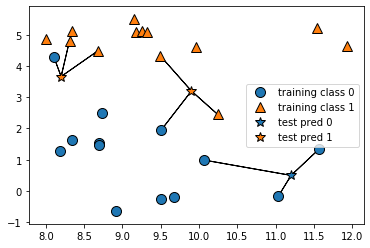

In [2]:
# Wieerholung mit FAktor 3 also 3 Nachbarn
X,y = mglearn.datasets.make_forge()
mglearn.plots.plot_knn_classification(n_neighbors=3) # Diese Funktion ist nur zu Demonstrationszwecken

#### Arbeiten mit sklearn

In [5]:
# Daten beschaffen
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# Aufteilen der Daten in Tranings und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# Der Klassifier / die Methode instanziieren
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
# Das Modell erzeugen    -> fit
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
# Die potenziellen Vorhersagen für die Testdaten anzeigen -> predict
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [9]:
# Die Genauigkeit der Vorhersage messen --> score
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


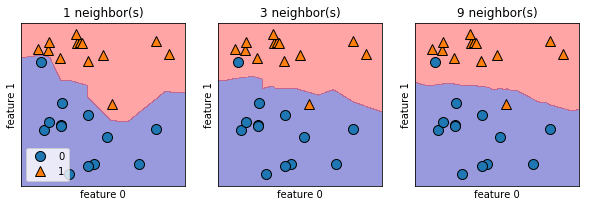

In [13]:
# Im folgenden Code wird der Effekt des Erhöhens von k graphisch demonstriert
# bei steigendem k wird die Vorhersage-Genauigkeit generalisiert, das Modell passt also besser zu neuen, unbekannten 
#      Werten

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

#### Anwendung des Ganzen auf den Cancer - Datensatz

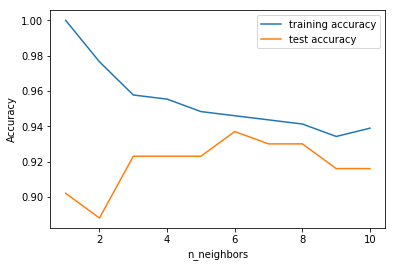

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()